In [36]:
import numpy as np
import pandas as pd
from sklearn import datasets
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

In [4]:
wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
df['quality'] = wine.target

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
df['quality'].value_counts()

1    71
0    59
2    48
Name: quality, dtype: int64

In [10]:
df_data = df.iloc[:,:-1].copy()
df_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [25]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x =  ss.fit_transform(df_data)
y = df.iloc[:,-1]
# 데이터 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,random_state=42)

In [26]:
# 모델 설계
# 1. 시퀀스
# 2. 히든층 - 4개층  - activation
# 3. 컴파일  - optimize, loss, metrics
def build_model():
    model = Sequential()
    model.add(Dense(128,activation='relu',input_dim = 13))
    
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(3,activation='softmax'))  # 이진분류  sigmoid / 다중 분류  softmax
    model.compile(optimizer='Adam',loss = tf.keras.losses.categorical_crossentropy,
                 metrics=['mae','acc'])
    return model 


In [27]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1792      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 12,227
Trainable params: 12,227
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 신경망에서 출력의 개수와 맞도록 target의 차수를 변경해 줘야 한다.
# one-hotencording으로 변경한다.
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)

In [31]:
x_train.shape, y_train_categorical.shape

((133, 13), (133, 3))

In [32]:
# 4. 학습
# model = build_model()
history = model.fit(x_train,y_train_categorical,epochs=200,batch_size=64)

Epoch 1/200
3/3 [==============================] - 0s 3ms/step - loss: 1.0730 - mae: 0.4352 - acc: 0.4887
Epoch 2/200
3/3 [==============================] - 0s 2ms/step - loss: 0.8871 - mae: 0.3886 - acc: 0.7669
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 0.7436 - mae: 0.3448 - acc: 0.8872
Epoch 4/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6273 - mae: 0.3036 - acc: 0.9398
Epoch 5/200
3/3 [==============================] - 0s 2ms/step - loss: 0.5316 - mae: 0.2661 - acc: 0.9624
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 0.4462 - mae: 0.2295 - acc: 0.9624
Epoch 7/200
3/3 [==============================] - 0s 1ms/step - loss: 0.3747 - mae: 0.1967 - acc: 0.9699
Epoch 8/200
3/3 [==============================] - 0s 2ms/step - loss: 0.3123 - mae: 0.1669 - acc: 0.9774
Epoch 9/200
3/3 [==============================] - 0s 2ms/step - loss: 0.2578 - mae: 0.1400 - acc: 0.9774
Epoch 10/200
3/3 [============================

3/3 [==============================] - 0s 2ms/step - loss: 0.0015 - mae: 9.8182e-04 - acc: 1.0000
Epoch 78/200
3/3 [==============================] - 0s 1ms/step - loss: 0.0014 - mae: 9.5025e-04 - acc: 1.0000
Epoch 79/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0014 - mae: 9.1932e-04 - acc: 1.0000
Epoch 80/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0013 - mae: 8.9452e-04 - acc: 1.0000
Epoch 81/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0013 - mae: 8.7030e-04 - acc: 1.0000
Epoch 82/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0013 - mae: 8.4674e-04 - acc: 1.0000
Epoch 83/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 8.2571e-04 - acc: 1.0000
Epoch 84/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 8.0869e-04 - acc: 1.0000
Epoch 85/200
3/3 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 7.8862e-04 - acc: 1.0000
Epoch 86/200
3

3/3 [==============================] - 0s 2ms/step - loss: 3.4075e-04 - mae: 2.2692e-04 - acc: 1.0000
Epoch 149/200
3/3 [==============================] - 0s 2ms/step - loss: 3.3651e-04 - mae: 2.2410e-04 - acc: 1.0000
Epoch 150/200
3/3 [==============================] - 0s 3ms/step - loss: 3.3276e-04 - mae: 2.2160e-04 - acc: 1.0000
Epoch 151/200
3/3 [==============================] - 0s 2ms/step - loss: 3.2860e-04 - mae: 2.1884e-04 - acc: 1.0000
Epoch 152/200
3/3 [==============================] - 0s 3ms/step - loss: 3.2471e-04 - mae: 2.1624e-04 - acc: 1.0000
Epoch 153/200
3/3 [==============================] - 0s 2ms/step - loss: 3.2063e-04 - mae: 2.1353e-04 - acc: 1.0000
Epoch 154/200
3/3 [==============================] - 0s 1ms/step - loss: 3.1743e-04 - mae: 2.1140e-04 - acc: 1.0000
Epoch 155/200
3/3 [==============================] - 0s 1ms/step - loss: 3.1330e-04 - mae: 2.0865e-04 - acc: 1.0000
Epoch 156/200
3/3 [==============================] - 0s 2ms/step - loss: 3.0980e-04 - 

In [33]:
import matplotlib.pyplot as plt

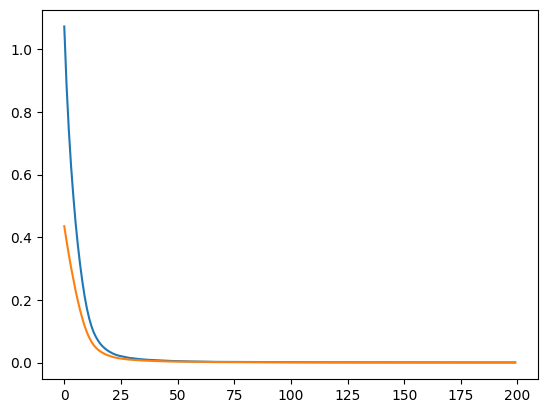

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
# plt.plot(history.history['acc'])

In [37]:
# 머신러닝의 규제방법 - Drop out
# Dropout 층을만들어서  적용
def build_dropout_model():
    model = Sequential()
    model.add(Dense(128,activation='relu',input_dim = 13))
    model.add(Dropout(0.2))
    
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(3,activation='softmax'))  # 이진분류  sigmoid / 다중 분류  softmax    
    
    model.compile(optimizer='Adam',loss = tf.keras.losses.categorical_crossentropy,
                 metrics=['mae','acc'])
    return model 


In [38]:
history = model.fit(x_train,y_train_categorical,epochs=200,batch_size=64)

Epoch 1/200
3/3 [==============================] - 0s 2ms/step - loss: 1.7982e-04 - mae: 1.1981e-04 - acc: 1.0000
Epoch 2/200
3/3 [==============================] - 0s 3ms/step - loss: 1.7790e-04 - mae: 1.1853e-04 - acc: 1.0000
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 1.7575e-04 - mae: 1.1710e-04 - acc: 1.0000
Epoch 4/200
3/3 [==============================] - 0s 2ms/step - loss: 1.7376e-04 - mae: 1.1578e-04 - acc: 1.0000
Epoch 5/200
3/3 [==============================] - 0s 3ms/step - loss: 1.7188e-04 - mae: 1.1452e-04 - acc: 1.0000
Epoch 6/200
3/3 [==============================] - 0s 3ms/step - loss: 1.6998e-04 - mae: 1.1326e-04 - acc: 1.0000
Epoch 7/200
3/3 [==============================] - 0s 2ms/step - loss: 1.6771e-04 - mae: 1.1174e-04 - acc: 1.0000
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 1.6599e-04 - mae: 1.1060e-04 - acc: 1.0000
Epoch 9/200
3/3 [==============================] - 0s 3ms/step - loss: 1.6438e-04 - mae:

3/3 [==============================] - 0s 1ms/step - loss: 9.3555e-05 - mae: 6.2350e-05 - acc: 1.0000
Epoch 73/200
3/3 [==============================] - 0s 2ms/step - loss: 9.2807e-05 - mae: 6.1856e-05 - acc: 1.0000
Epoch 74/200
3/3 [==============================] - 0s 2ms/step - loss: 9.2077e-05 - mae: 6.1369e-05 - acc: 1.0000
Epoch 75/200
3/3 [==============================] - 0s 2ms/step - loss: 9.1462e-05 - mae: 6.0959e-05 - acc: 1.0000
Epoch 76/200
3/3 [==============================] - 0s 2ms/step - loss: 9.0577e-05 - mae: 6.0369e-05 - acc: 1.0000
Epoch 77/200
3/3 [==============================] - 0s 3ms/step - loss: 9.0014e-05 - mae: 5.9992e-05 - acc: 1.0000
Epoch 78/200
3/3 [==============================] - 0s 2ms/step - loss: 8.9259e-05 - mae: 5.9489e-05 - acc: 1.0000
Epoch 79/200
3/3 [==============================] - 0s 2ms/step - loss: 8.8661e-05 - mae: 5.9092e-05 - acc: 1.0000
Epoch 80/200
3/3 [==============================] - 0s 2ms/step - loss: 8.8086e-05 - mae: 5.8

Epoch 143/200
3/3 [==============================] - 0s 2ms/step - loss: 5.8084e-05 - mae: 3.8717e-05 - acc: 1.0000
Epoch 144/200
3/3 [==============================] - 0s 2ms/step - loss: 5.7714e-05 - mae: 3.8472e-05 - acc: 1.0000
Epoch 145/200
3/3 [==============================] - 0s 2ms/step - loss: 5.7400e-05 - mae: 3.8260e-05 - acc: 1.0000
Epoch 146/200
3/3 [==============================] - 0s 5ms/step - loss: 5.7055e-05 - mae: 3.8031e-05 - acc: 1.0000
Epoch 147/200
3/3 [==============================] - 0s 3ms/step - loss: 5.6717e-05 - mae: 3.7807e-05 - acc: 1.0000
Epoch 148/200
3/3 [==============================] - 0s 1ms/step - loss: 5.6365e-05 - mae: 3.7570e-05 - acc: 1.0000
Epoch 149/200
3/3 [==============================] - 0s 4ms/step - loss: 5.5933e-05 - mae: 3.7281e-05 - acc: 1.0000
Epoch 150/200
3/3 [==============================] - 0s 1ms/step - loss: 5.5520e-05 - mae: 3.7008e-05 - acc: 1.0000
Epoch 151/200
3/3 [==============================] - 0s 1ms/step - loss:

In [39]:
# 콜백함수..... 내가 만든함수를 내가 호출하는 게 아니라.. 등록해 놓으면 설정한 조건이되면... 호출되는
# 이벤트와 같이 사용
# 조기종료
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10)

In [40]:
model = build_dropout_model()

In [42]:
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train_categorical,random_state=42)

In [43]:
history = model.fit(x_train,y_train_categorical,batch_size=64,epochs=1000,
          callbacks=[early_stopping],validation_data=(x_val,y_val))

Epoch 1/1000
3/3 [==============================] - 1s 98ms/step - loss: 1.0128 - mae: 0.4165 - acc: 0.4286 - val_loss: 0.8923 - val_mae: 0.3857 - val_acc: 0.6176
Epoch 2/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.9232 - mae: 0.3912 - acc: 0.5714 - val_loss: 0.8103 - val_mae: 0.3601 - val_acc: 0.7353
Epoch 3/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.8573 - mae: 0.3716 - acc: 0.6917 - val_loss: 0.7362 - val_mae: 0.3351 - val_acc: 0.8824
Epoch 4/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.7659 - mae: 0.3421 - acc: 0.7744 - val_loss: 0.6663 - val_mae: 0.3109 - val_acc: 0.9118
Epoch 5/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.7134 - mae: 0.3250 - acc: 0.8195 - val_loss: 0.5989 - val_mae: 0.2858 - val_acc: 0.9118
Epoch 6/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6410 - mae: 0.3007 - acc: 0.9023 - val_loss: 0.5349 - val_mae: 0.2605 - val_acc: 0.9412
Epoch 7/1000
3/3 [====

3/3 [==============================] - 0s 15ms/step - loss: 0.0230 - mae: 0.0115 - acc: 0.9925 - val_loss: 0.0076 - val_mae: 0.0049 - val_acc: 1.0000
Epoch 52/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0118 - mae: 0.0076 - acc: 1.0000 - val_loss: 0.0075 - val_mae: 0.0049 - val_acc: 1.0000
Epoch 53/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0219 - mae: 0.0122 - acc: 0.9925 - val_loss: 0.0076 - val_mae: 0.0049 - val_acc: 1.0000
Epoch 54/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0147 - mae: 0.0092 - acc: 1.0000 - val_loss: 0.0075 - val_mae: 0.0048 - val_acc: 1.0000
Epoch 55/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0198 - mae: 0.0108 - acc: 0.9925 - val_loss: 0.0072 - val_mae: 0.0046 - val_acc: 1.0000
Epoch 56/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0116 - mae: 0.0072 - acc: 1.0000 - val_loss: 0.0069 - val_mae: 0.0044 - val_acc: 1.0000
Epoch 57/1000
3/3 [===========

3/3 [==============================] - 0s 14ms/step - loss: 0.0120 - mae: 0.0071 - acc: 1.0000 - val_loss: 0.0022 - val_mae: 0.0014 - val_acc: 1.0000


In [ ]:
# 5. 평가(evluation)
# 6, 교차검증
# 학습결과를 가지고 시각 - 적절한 epoch와 batch

In [ ]:
# 인공신경망 적용순서
# 1. 시퀀스
# 2. 층을 결합 + Dropout - 과적합
# 3. 컴파일
# 4. 학습 - 조기종료

In [ ]:
# 층  Dense
# 활성화함수 (activation  = 'relu')  
# 출력갯수(뉴런)
# 이 층이 마지막이면.... 이진분류  sigmoid   1   다중분류면 softmax  클래스갯수만큼
# 맨처음 Dense는 최초 입력데이터와 연결되기때문에.. 입력차수를 넣어준다.

# Dropout은 특정비율로 가중치를 무효화 시킨다. 

In [44]:
# 3. 컴파일
# 최적화 옵티마이져... Adam RMSprop, 
# 손실함수 
# 회귀 : mse
# 분류 : 이진 binary_crossentropy
#        다중 categorical_crossentropy  tf.keras.losses.categorical_crossentropy


In [ ]:
# 4. 학습 - 조기종료
# 학습데이터, 검증데이터, 콜백함수(조기종료)